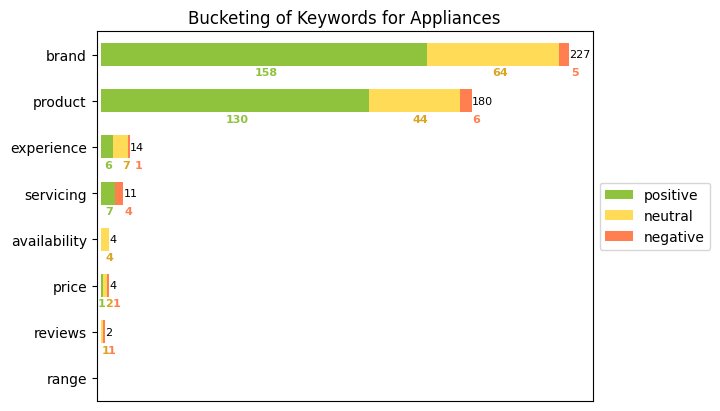

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Loading the input file
df = pd.read_csv('Interio_bucketing.csv')

# Define the desired order of the stacks
stack_order = ['positive', 'neutral', 'negative']

# Define the desired colors for each stack
stack_colors = {'positive': '#8FC33E', 'neutral': '#FFDB58', 'negative': '#FF7F50'}

text_colors = {'positive': '#8FC33E', 'neutral': '#DAA520', 'negative': '#FF7F50'}

# Calculate the counts for each label and category
product = df['product'].value_counts()
price = df['price'].value_counts()
range = df['range'].value_counts()
availability = df['availability'].value_counts()
reviews = df['reviews'].value_counts()
servicing = df['servicing'].value_counts()
brand = df['brand'].value_counts()
experience = df['experience'].value_counts()

# Create a DataFrame with the counts
df_counts = pd.DataFrame({'product': product, 'price': price, 'range': range, 'availability': availability, 'reviews': reviews, 'servicing': servicing, 'brand': brand, 'experience': experience})

# Reorder the stacks within each column based on the desired order
df_counts = df_counts.apply(lambda x: x.loc[stack_order])

# Sort the columns based on the total number of responses
df_counts = df_counts[df_counts.sum().sort_values(ascending=True).index]

# Transpose the DataFrame
df_counts = df_counts.transpose()

# Calculate the total number of responses
total_responses = df_counts.sum(axis=1)

# Create a stacked horizontal bar plot with updated stack colors
ax = df_counts.plot(kind='barh', stacked=True, color=[stack_colors.get(x) for x in df_counts.columns])

# Rest of the code...

# Set the title and labels
plt.yticks(rotation=0)  # Rotate y-axis labels
plt.title('Bucketing of Keywords for Appliances')

# Get the current axis object
ax = plt.gca()

# Set the x-axis tick labels position to bottom
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Set the y-axis tick labels position to left
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)

# Set the x and y-axis label positions
ax.xaxis.set_label_coords(0.5, -0.5)
ax.yaxis.set_label_coords(-0.1, 0.5)

# Move the legend to the right side of the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Set the x-axis limits to move the total downwards
ax.set_xlim(left=-2)
spacing = 13
padding = 0  # Initial padding offset


for container in ax.containers:
    for patch in container.patches:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_y() + patch.get_height() / 2
        value = int(patch.get_width())  # Convert the value to an integer
        
        if value > 0:
            stack_label = container.get_label()
            text_color = text_colors.get(stack_label, 'black')  # Get the text color for the current stack
            ax.annotate(value, (x, y), ha='center', va='center', fontsize=8, color=text_color, fontweight="bold", xytext=(padding, -spacing), textcoords='offset points', bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.2'))
            padding += 0.5  # Increase the padding for the next annotation

# Add the sum of responses for each stack
for i, category in enumerate(df_counts.index):
    x = int(total_responses[category])  # Convert the value to an integer
    y = 0 + i  # Adjust the vertical position of the sum label

    if x > 0:
        ax.annotate(str(x), (x, y), ha='left', va='center', fontsize=8, color='black')


# Adjust the spacing between the value labels
for label in ax.get_ymajorticklabels():
    label.set_x(label.get_position()[0] - 0)  # Adjust the value to increase or decrease spacing

# Display the plot
plt.show()  

